In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

creating and splitting the dataset 

In [3]:
X,y=make_circles(n_samples=500,factor=0.5,noise=0.05,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

creating and training Non-Linear SVM model 

In [4]:
svm=SVC(kernel='rbf',C=1,gamma=0.5)
svm.fit(X_train,y_train)


,C,1
,kernel,'rbf'
,degree,3
,gamma,0.5
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


making predictions and evaluating the model

In [5]:
y_pred=svm.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


We define a function to visualize the decision boundary of the trained non-linear SVM on the dataset.

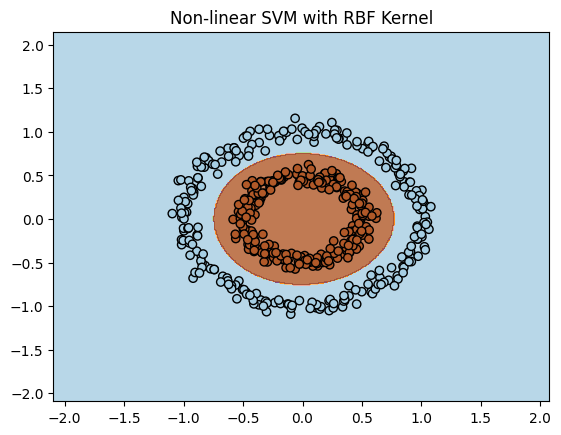

In [7]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title("Non-linear SVM with RBF Kernel")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, svm)